# Heart Disease Classifier – Final Project

In [7]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## 1. Data Loading & Cleaning

Our dataset (https://archive.ics.uci.edu/dataset/45/heart+disease) have 14 features, two of which (ca and thal) have missing values. We checked the dataset and found that 6 rows contain missing values. From here we have two main options to make the dataset usable.

1. **Exclude the 6 incomplete rows:** This is simple and safe. The dataset contains 303 rows, so removing 6 will reduce the size to roughly 98% which most likely wont affect the performance a lot. However, this solution assumes that the missing data have no correlation to the other values.
2. **Fill the missing data using the mean or mode:** For numerical features (like ca), the mean can be used. And for categorical features (like thal), the mode can be used
3. **Predict the missing values:** We could also try to predict the values using regression or KNN

**Our choice:** We choose the first option since it keeps the cleaning process simple and avoids inacurrate assumptions that could affect our results.P

In [8]:
# Load the data
df = pd.read_csv("./heart+disease/processed.cleveland.data", header=None, na_values="?")

# Add column names (from the 14 features)
df.columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

# Check for missing values
print(df.isna().sum())

# Drop all the rows that are incomplete
df_clean = df.dropna()

print(f"Original size: {len(df)} rows")
print(f"After dropping missing: {len(df_clean)} rows")
# 6 rows dropped. Seems to check out!

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
Original size: 303 rows
After dropping missing: 297 rows


## 2. Exploratory Data Analysis (EDA)

First, we'll take a look at all the features to see what are numerical and what are categorical. The infromation for the data set says that all of the values are transfered to numerical which is good! But for the PCA and GMM in 3.

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object


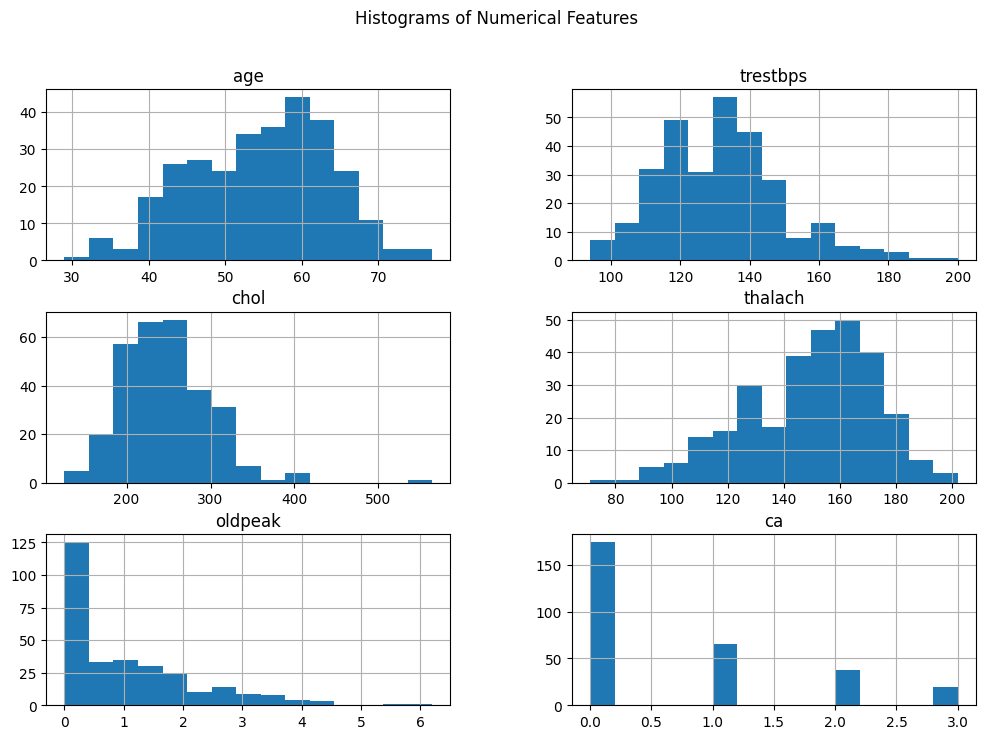

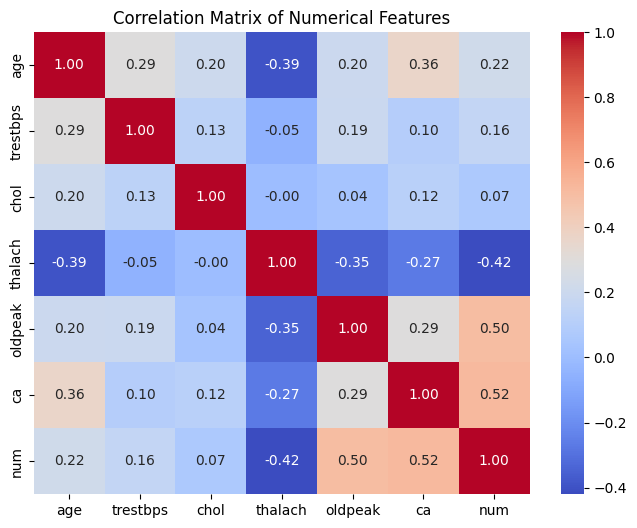

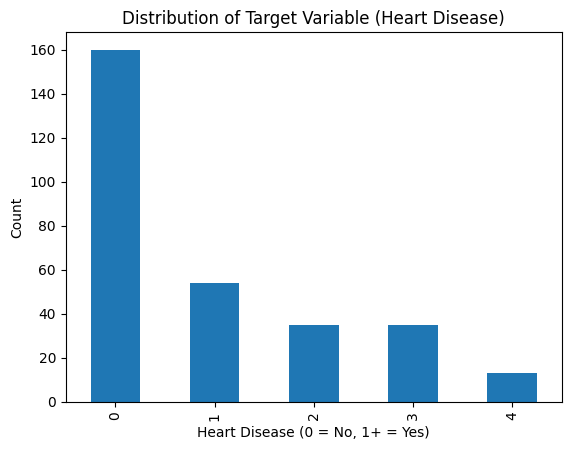

In [9]:
# Preview the first few rows
print(df_clean.head())

# Check data types
print(df_clean.dtypes)

# All the numerical features
numerical_features = [ "age", "trestbps", "chol", "thalach", "oldpeak", "ca", "num" ]
X_numerical = df_clean[numerical_features]
X_unsupervised = X_numerical.drop(columns="num")

# We dont want the labeldata for the unsupervised learning.
X_unsupervised.hist(bins=15, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(X_numerical.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

df_clean["num"].value_counts().plot(kind="bar")
plt.title("Distribution of Target Variable (Heart Disease)")
plt.xlabel("Heart Disease (0 = No, 1+ = Yes)")
plt.ylabel("Count")
plt.show()

## 3. Unsupervised Learning: PCA + GMM

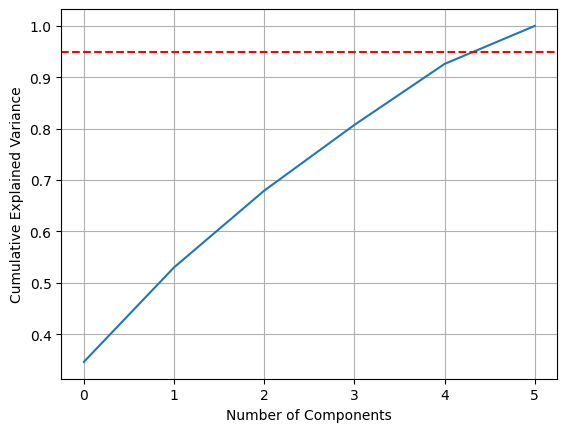

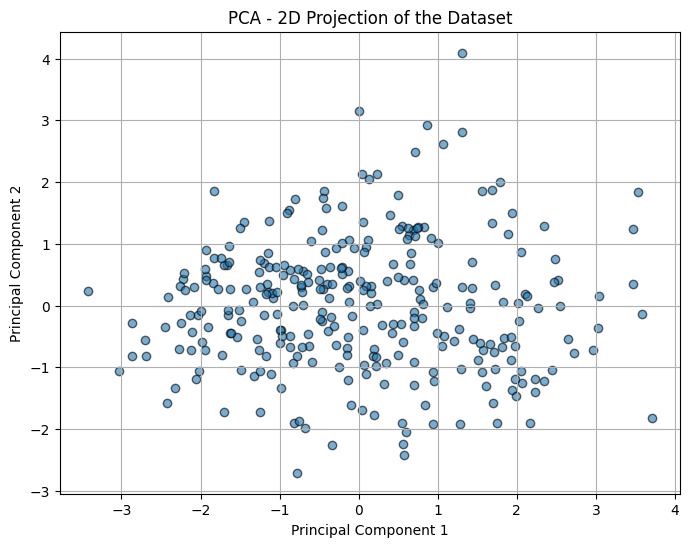

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)

pca = PCA().fit(X_scaled)  # Fit PCA without limiting components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# plt.axhline(y=0.95, color='r', linestyle='--')  # Common threshold (e.g., 95%)
plt.grid()
plt.show()

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Projection of the Dataset")
plt.grid(True)
plt.show()

## 4. Supervised Learning: SVM, Random Forest, KNN

<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
C:\Users\eriks\AppData\Local\Temp\ipykernel_50336\847623333.py:18: SyntaxWarning: invalid escape sequence '\p'
  fst_empty_cell = (columnwidth-3)//2 * " " + "t\p" + (columnwidth-3)//2 * " "


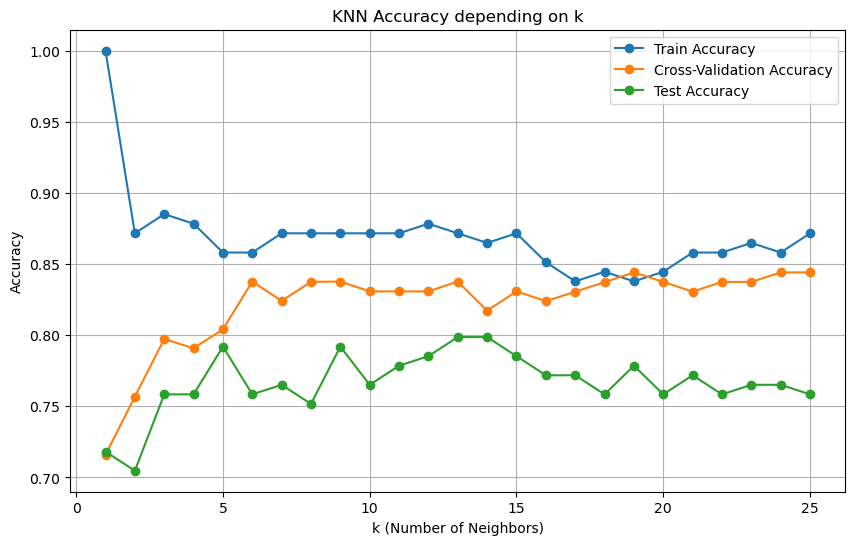

KNN best k based on cross-validation: 24 (Accuracy: 0.8441)
KNN best k based on training and test data: (1, 13) (Accuracy: (1.0, 0.7986577181208053)) 


KNN Accuracy: 0.7986577181208053
          t\p         0: problems 1: no problems 
       0: problems          62.00           8.00 
    1: no problems          22.00          57.00 
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        70
           1       0.88      0.72      0.79        79

    accuracy                           0.80       149
   macro avg       0.81      0.80      0.80       149
weighted avg       0.81      0.80      0.80       149

SVM Accuracy: 0.7919463087248322
          t\p         0: problems 1: no problems 
       0: problems          61.00           9.00 
    1: no problems          22.00          57.00 
              precision    recall  f1-score   support

           0       0.73      0.87      0.80        70
           1       0.86      0.72      0.79  

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### from sklearn.model_selection import GridSearchCV this might be worth using

"""function taken from lab 3"""
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    """taken from https://gist.github.com/zachguo/10296432"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth

    # Begin CHANGES
    fst_empty_cell = (columnwidth-3)//2 * " " + "t\p" + (columnwidth-3)//2 * " "

    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")
    # End CHANGES

    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")

    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()






X = df_clean.drop(columns=["num"])
y = df_clean["num"].apply(lambda x: 1 if x > 0 else 0) # binary test if heart disease or not

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# makes distances more equal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




from sklearn.model_selection import cross_val_score



k_values = range(1, 26)
cv_scores = []
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit using training data
    knn.fit(X_train_scaled, y_train)
    
    # Accuracy from training data
    train_acc = accuracy_score(y_train, knn.predict(X_train_scaled))
    train_scores.append(train_acc)
    
    # Accuracy from test data
    test_acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    test_scores.append(test_acc)
    
    # Cross-validation accuracy 5-fold, (WE MIGHT WANT TO TEST cv TOO!!!)
    cv_acc = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_scores.append(cv_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(k_values, cv_scores, label='Cross-Validation Accuracy', marker='o')
plt.plot(k_values, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy depending on k')
plt.legend()
plt.grid(True)
plt.show()

# Print best k
print(f"KNN best k based on cross-validation: {k_values[np.argmax(cv_scores)]} (Accuracy: {max(cv_scores):.4f})")
print(f"KNN best k based on training and test data: {k_values[np.argmax(train_scores)], k_values[np.argmax(test_scores)]} (Accuracy: {max(train_scores), max(test_scores)}) \n\n")
# k = 13 is overall best

accuracy_scores = {}

# KNN
knn_model = KNeighborsClassifier(n_neighbors=13)

# Train the model, predict from test data
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate performance
accuracy_scores["KNN"] = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_scores["KNN"])
print_cm(confusion_matrix(y_test, y_pred_knn), [f"{np.unique(y_test)[0]}: problems", f"{np.unique(y_test)[1]}: no problems"])
print(classification_report(y_test, y_pred_knn))



# SVM
svm_model = SVC(kernel='linear', random_state=42) # we can use rbf but it requires an extra parameter C to first evaluate (ADD LATER!!!)

# Train the model, predict from test data
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate performance
accuracy_scores["SVM"] = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_scores["SVM"])
print_cm(confusion_matrix(y_test, y_pred_svm), [f"{np.unique(y_test)[0]}: problems", f"{np.unique(y_test)[1]}: no problems"])
print(classification_report(y_test, y_pred_svm))



# Random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # FIGURE OUT BEST n_estimators, LIKE KNN!!!

# Train the model, predict from test data
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
accuracy_scores["Random Forest"] = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_scores["Random Forest"])
print_cm(confusion_matrix(y_test, y_pred_rf), [f"{np.unique(y_test)[0]}: problems", f"{np.unique(y_test)[1]}: no problems"])
print(classification_report(y_test, y_pred_rf))

print(f"Best model: {max(accuracy_scores)}, at accuracy {accuracy_scores[max(accuracy_scores)]:.4f}")

## 5. Feature Selection & Feature Importance

## 6. Evaluation: Accuracy, F1, Confusion Matrix


## 7. Conclusions & Discussion